# Wisconsin Diagnostic Breast Cancer

# Explorative Data Analysis (EDA)

569 instances with breast cancer dignosis (212 malignant, 357 benign) and 30 predictor variables.

See also original [UCI source](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29).

In [1]:
import time
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport
import sklearn.datasets as datasets
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset in pandas

In [2]:
data = datasets.load_breast_cancer()
#print(data['DESCR'])

X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = pd.Series(data['target'], name='target')

In [3]:
# do data profiling and save html report to file
report = ProfileReport(X)
report.to_file(outputfile="wdbc_data_profile.html")

## Analyse target class distribution

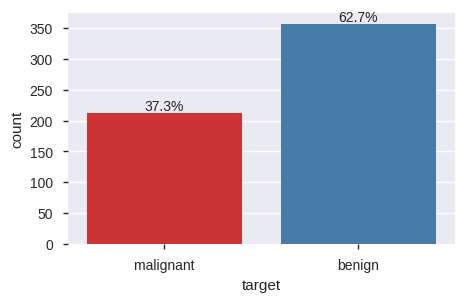

In [4]:
def show_percent(ax, ncount):
    """https://stackoverflow.com/questions/33179122/seaborn-countplot-with-frequencies"""
    for p in ax.patches:
        x = p.get_bbox().get_points()[:, 0]
        y = p.get_bbox().get_points()[1, 1]
        ax.annotate(
            "{:.1f}%".format(100.0 * y / ncount),
            (x.mean(), y),
            ha="center",
            va="bottom",
        )

fig, ax = plt.subplots(figsize=(5,3))
sns.countplot(y, palette="Set1", ax=ax)
ax.set_xticklabels(data['target_names'])
show_percent(ax, len(y))

## Analyse Variable Distribution

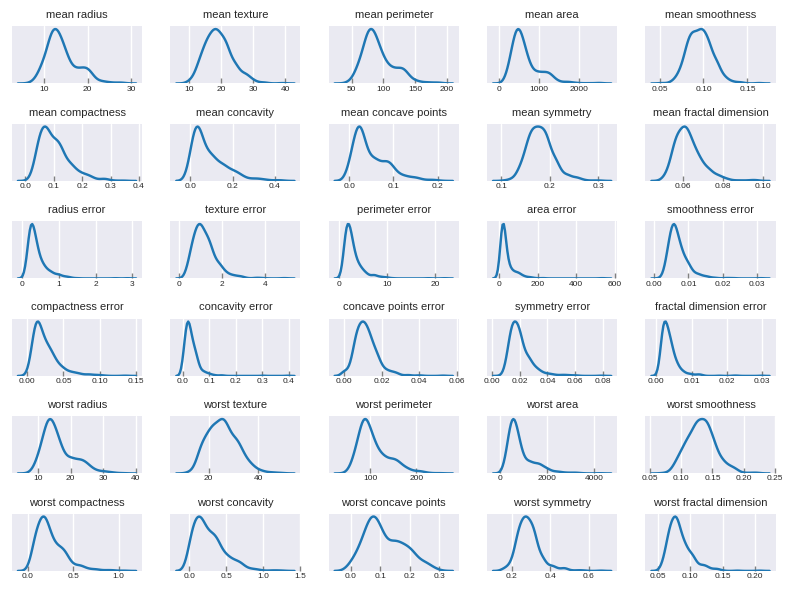

In [5]:
fig, axs = plt.subplots(ncols=5, nrows=6, figsize=(8,6))
axs = axs.ravel()
for i in range(X.shape[1]):
    sns.kdeplot(X.iloc[:,i], ax=axs[i], legend=False)
    axs[i].set_title(X.columns[i], size=8)
    axs[i].yaxis.set_major_locator(plt.NullLocator())
    axs[i].tick_params(axis='x', which='major', direction='in', color='grey', labelsize=6, pad=1.5)
fig.tight_layout()

## Analye Variable Combinations

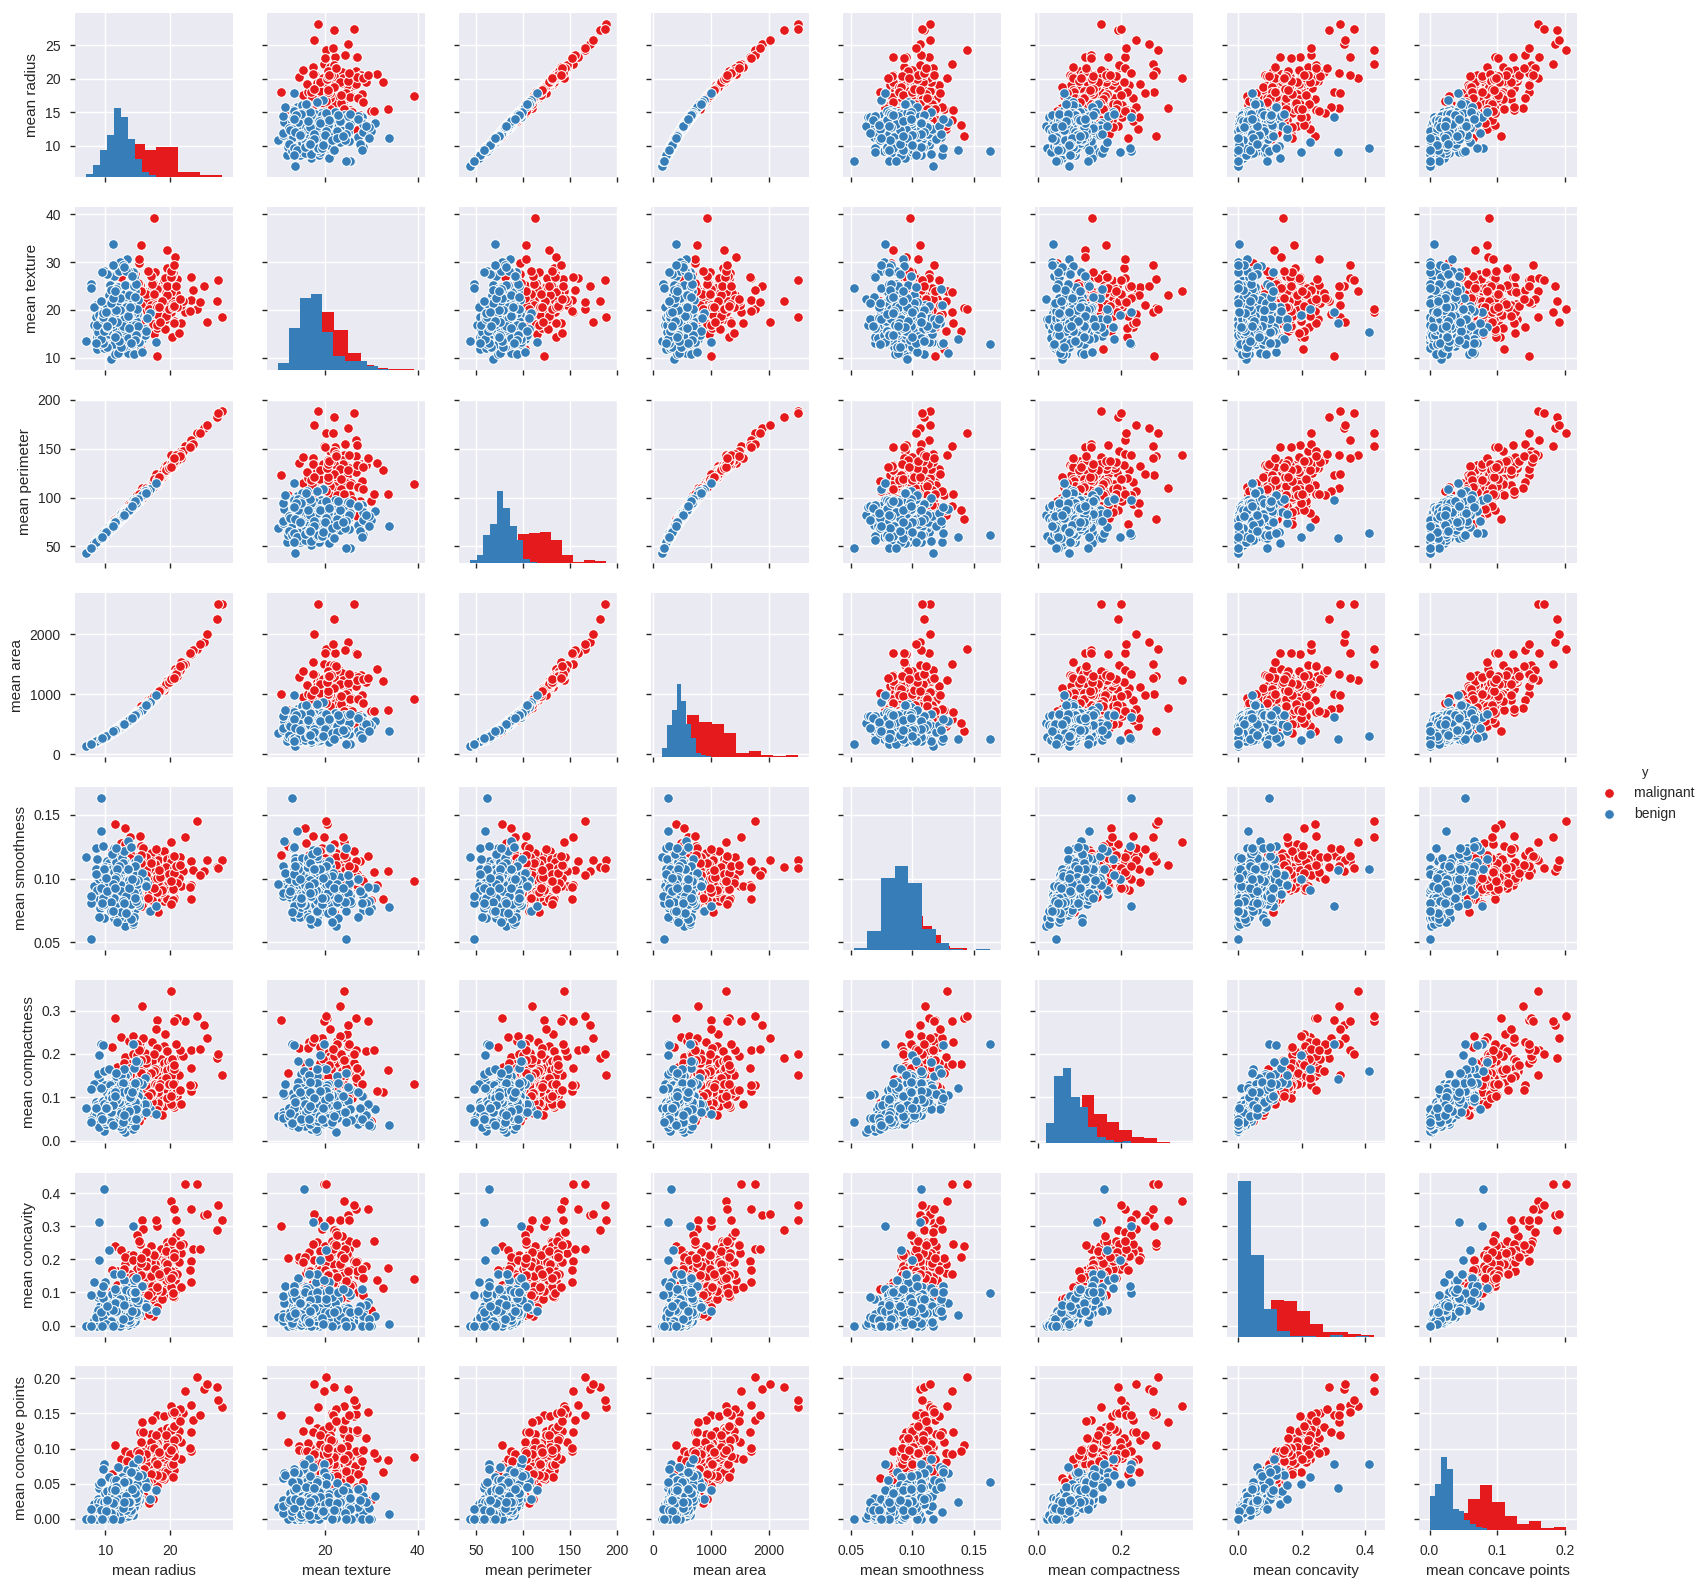

In [6]:
# pairplot of first features
sns.pairplot(X[X.columns[:8]].assign(y=data['target_names'][y]), vars=X.columns[:8], hue='y', diag_kind='hist', palette="Set1", height=2, aspect=1);

## Analyse Variable Correlation

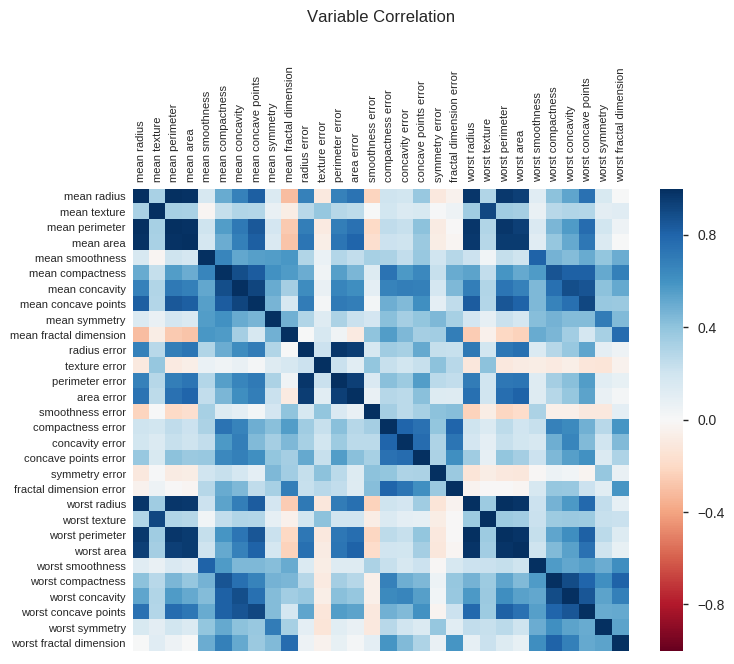

In [7]:
def corrplot(df, title=None):
    fig, ax = plt.subplots(figsize=(8,6))
    sns.heatmap(df.corr(), vmin=-1, vmax=1, center=0, cmap='RdBu', ax=ax);
    ax.tick_params(axis='x', which='major', labeltop=True, bottom=False, labelbottom=False, color='grey', rotation=90, labelsize=8, pad=1.5)
    ax.tick_params(axis='y', which='major', left=False, color='grey', labelsize=8, pad=1.5)
    plt.title(title,pad=120, size=12)

corrplot(X, 'Variable Correlation')

### and without variables rejected by data profiling

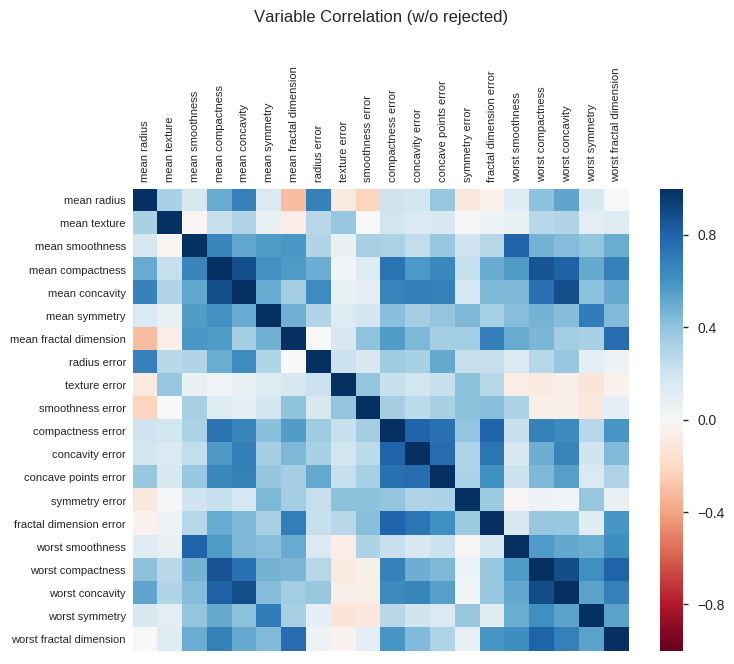

In [8]:
corrplot(X.drop(report.get_rejected_variables(), axis=1), 'Variable Correlation (w/o rejected)')